In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the datasets
df= pd.read_csv(r"C:\Users\babysitter\Desktop\datasets\Balaji Fast Food Sales.csv",delimiter=',')   
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07/03/2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02/03/2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10/02/2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [16]:
df.shape

(1000, 10)

In [17]:
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [18]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

In [19]:
# Check for missing values
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [21]:
df['transaction_type'] = df['transaction_type'].fillna('Other')


In [22]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Other,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [23]:
# Top-selling items
top_items = df.groupby('item_name').agg(
    total_quantity=('quantity', 'sum'),
    total_revenue=('transaction_amount', 'sum')
).sort_values(by='total_quantity', ascending=False).head(10)

top_items

,total_quantity,total_revenue
item_name,,
Cold coffee,1361,54440
Sugarcane juice,1278,31950
Panipuri,1226,24520
Frankie,1150,57500
Sandwich,1097,65820
Aalopuri,1044,20880
Vadapav,1006,20120


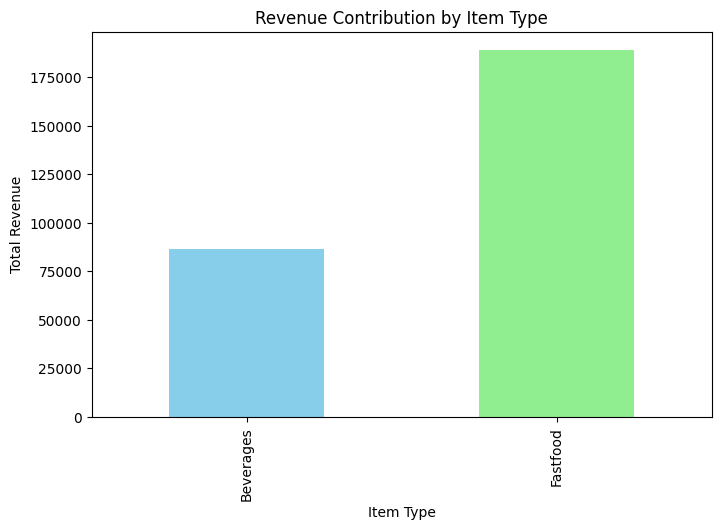

In [24]:
# Revenue contribution by item type
item_type_revenue = df.groupby('item_type')['transaction_amount'].sum()

# Plot revenue contribution
plt.figure(figsize=(8, 5))
item_type_revenue.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Revenue Contribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.show()

In the context of **revenue contribution by item type**, if you see that **Beverages** contribute 80,000 and **Fastfood** contributes 180,000, this provides a clear indication of how much each category is contributing to the overall revenue.

### **Insights from the Data:**

1. **Revenue Distribution:**
   - **Fastfood** contributes more than twice the revenue of **Beverages**, with a total revenue of 180,000 compared to 80,000.
   - This shows that **Fastfood** is a major revenue generator for the restaurant, which could indicate that it is either more popular or priced higher than **Beverages**.
   
2. **Implication of the Data:**
   - If Fastfood items are contributing more, it may suggest a greater demand for these items or better profit margins. Conversely, while **Beverages** generate less revenue, it could also mean that they have a higher profit margin, especially if the sales volume is large but the cost is relatively low.
   
3. **So What (Actionable Insights):**
   - **Promote Fastfood:** Given its higher revenue contribution, you might want to explore strategies to increase the sales of **Beverages**, either through targeted promotions, bundling with Fastfood items, or highlighting them on the menu.
   - **Upsell Beverages:** Since Beverages contribute less, you could create combo deals (e.g., "Add a Cold Drink to Your Meal") or introduce new, premium-priced beverage options to boost this category’s revenue.
   - **Evaluate Pricing:** If Fastfood items have significantly higher revenues, they might be priced correctly. However, it's worth evaluating the price points for **Beverages** and considering raising prices for premium options or offering larger serving sizes.
   - **Analyze Profit Margins:** Investigate whether Fastfood items have lower or higher profit margins than Beverages. If the profit margin for Beverages is higher, focus on increasing sales in this category without compromising its value proposition.

When analyzing revenue, it’s crucial to look beyond just **sales volume** (how much is sold) and focus on **profitability** (how much profit is generated). Here’s why the balance between volume and profitability matters, and how you can use it to make strategic decisions:

### 1. **Sales Volume vs. Profit Margin:**
   - **Sales Volume** indicates how many units are sold. However, a product might have high sales volume but also low profit margins. This means that while you're selling a lot, you're not making as much money on each unit sold.
   - **Profitability (Profit Margin)**, on the other hand, tells you how much profit you make from each sale after accounting for costs (such as production, labor, and overhead).
   - **Balance Example:**
     - **Fastfood:** If Fastfood generates more revenue but has a **low profit margin** (because ingredients are cheap, but it’s labor-intensive), it might not be as profitable as it seems.
     - **Beverages:** If Beverages are generating lower revenue but have **high profit margins** (because the raw ingredients are cheaper), then increasing sales of Beverages could be very profitable, even if you sell fewer units.

### 2. **Strategic Implications of this Balance:**
   - **For High Volume, Low Margin Products (e.g., Fastfood):**
     - Focus on **increasing sales volume** even more by expanding customer reach, improving marketing, or creating deals to push bulk sales.
     - You may want to focus on **operational efficiency** (e.g., reduce costs, streamline production) to improve profitability on these items.
   
   - **For Low Volume, High Margin Products (e.g., Beverages):**
     - You may focus on strategies like **upselling** or **bundling** with higher volume items to increase sales.
     - Offer **premium options** or seasonal variations to entice customers to buy more.
     - Consider improving **pricing strategies** to take advantage of the high profit margins while maintaining customer satisfaction.

### 3. **Why the Balance Matters:**
   - By understanding both the volume and profitability, you can make better decisions about:
     - **Menu Design**: Do you focus on selling more of the high-volume but low-margin items or try to sell more of the high-margin but lower-volume items?
     - **Pricing Strategy**: If you know that one category has higher margins, you could adjust pricing strategies to increase their revenue without hurting sales volume.
     - **Promotion Strategies**: Tailor promotions based on which categories need more sales volume or better profitability. For example, you can run promotions for **Beverages** to increase sales, while offering **discounts or combo deals** on **Fastfood** to increase volume without cutting too deeply into profit margins.
  
### 4. **Example:**
   Let’s say Fastfood contributes $180,000 in revenue but has a **low profit margin of 10%**. This means your **actual profit** from Fastfood is:
   \[
   \text{Profit} = 180,000 \times 10\% = 18,000
   \]
   In comparison, Beverages contribute $80,000 in revenue but have a **high profit margin of 50%**. This means your **actual profit** from Beverages is:
   \[
   \text{Profit} = 80,000 \times 50\% = 40,000
   \]
   Despite Fastfood generating more revenue, Beverages are **more profitable** because they have higher margins.

### 5. **Key Takeaways:**
   - **Volume-driven items (e.g., Fastfood)** should be carefully managed to ensure costs are kept low and that any effort to increase sales also boosts profitability.
   - **Margin-driven items (e.g., Beverages)** should be marketed and priced effectively to leverage the high profit margin while keeping costs manageable.
   - The balance of these two strategies helps ensure that the restaurant not only drives **sales volume** but also improves its **overall profitability**.

By **analyzing the balance** between volume and profitability, the restaurant can make more informed decisions that maximize both revenue and profit. It’s about understanding **where** the revenue comes from, but more importantly, **how much profit** that revenue is generating.

In [25]:
# Extract month and year
df['year_month'] = df['date'].dt.to_period('M')

# Group data by month and calculate total transaction amounts
monthly_sales = df.groupby('year_month')['transaction_amount'].sum().reset_index()

# Convert 'year_month' back to datetime for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Calculate monthly growth rates
monthly_sales['growth_rate'] = monthly_sales['transaction_amount'].pct_change() * 100

monthly_sales


,year_month,transaction_amount,growth_rate
0,2022-04-01,17670,NaN
1,2022-05-01,26570,50.367855
2,2022-06-01,17335,-34.757245
3,2022-07-01,19490,12.431497
4,2022-08-01,22305,14.443304
5,2022-09-01,18640,-16.431293
6,2022-10-01,27205,45.949571
7,2022-11-01,22900,-15.824297
8,2022-12-01,23460,2.445415
9,2023-01-01,28670,22.208014


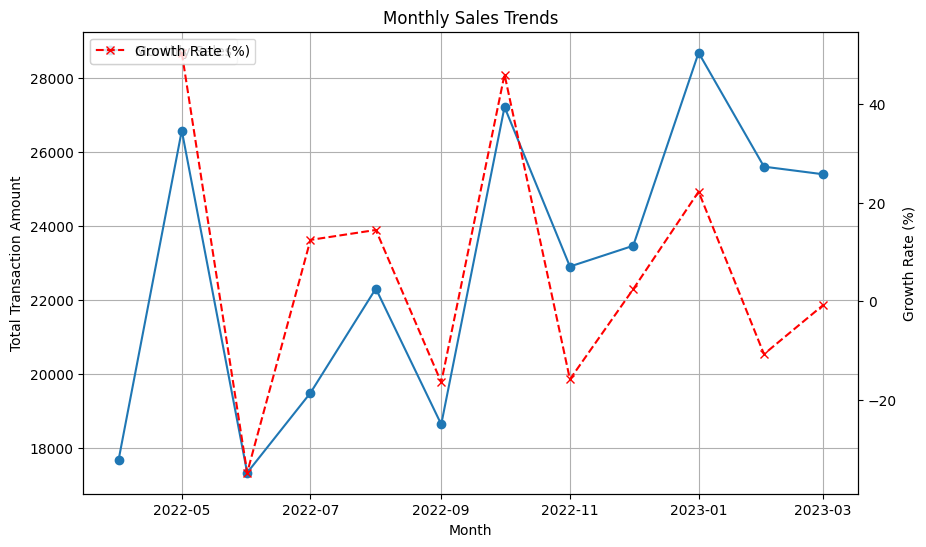

In [26]:
# Plot Monthly Sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['transaction_amount'], marker='o', linestyle='-', label='Monthly Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.grid()
plt.legend()

# Plot Monthly Growth Rates
plt.twinx()  # Add a secondary y-axis
plt.plot(monthly_sales['year_month'], monthly_sales['growth_rate'], color='red', marker='x', linestyle='--', label='Growth Rate (%)')
plt.ylabel('Growth Rate (%)')
plt.legend(loc='upper left')
plt.show()


### **Monthly Sales Trends Graph**

The graph above represents two key metrics over time:

1. **Total Transaction Amount** (Blue line with markers) - Represented on the **left y-axis**.
2. **Monthly Growth Rate (%)** (Red dashed line with markers) - Represented on the **right y-axis**.

---

### **Key Observations**

1. **Overall Sales Fluctuation:**
   - The blue line (transaction amounts) indicates that sales have shown significant variation from May 2022 to March 2023.
   - Some months experience sharp increases, while others show noticeable declines.

2. **Growth Rate Behavior:**
   - The red dashed line tracks how sales are changing month-over-month. It helps highlight the **percentage change** in transaction amounts compared to the previous month.
   - Positive growth means sales increased, while negative growth indicates a decline.

---

### **Detailed Analysis**

1. **May 2022 to June 2022: Sharp Increase**
   - **Total Sales:** Sales spiked sharply from May to June 2022, reaching a high point (~26,500).
   - **Growth Rate:** A significant positive growth rate was observed (above 40%), indicating strong momentum.

2. **June 2022 to July 2022: Drastic Decline**
   - **Total Sales:** Sales dropped steeply to their lowest point (~17,000) in July.
   - **Growth Rate:** The growth rate turned highly negative (around -40%), reflecting a sharp decline in sales performance.

3. **July 2022 to September 2022: Gradual Recovery**
   - **Total Sales:** From July onward, there was a gradual recovery, with sales increasing month-over-month until September.
   - **Growth Rate:** Positive growth resumed, showing that the business was rebounding during this period.

4. **September 2022 to October 2022: Sudden Dip**
   - **Total Sales:** There was another noticeable decline in total sales around October 2022.
   - **Growth Rate:** Growth fell back into negative territory.

5. **October 2022 to January 2023: Strong Recovery**
   - **Total Sales:** Sales peaked again in January 2023, showing the highest transaction amount (~28,500).
   - **Growth Rate:** Positive growth returned strongly in this period, with an evident upward trend.

6. **January 2023 to March 2023: Stabilization**
   - **Total Sales:** After January's peak, total transaction amounts slightly declined but remained relatively stable (~25,500).
   - **Growth Rate:** Growth rates dropped to lower positive or neutral values, indicating stabilization in sales trends.

---

### **What It Means:**

1. **Volatility in Sales:**
   - The graph shows a cyclical sales pattern, with alternating periods of **growth and decline**.
   - This could be due to factors such as seasonality, promotions, external economic conditions, or changes in customer demand.

2. **High Peaks and Sharp Dips:**
   - Months with significant spikes (like June and January) might coincide with events, holidays, or effective promotions.
   - Conversely, declines (e.g., July and October) may reflect low customer engagement, seasonal lulls, or competition.

3. **Stabilization in Early 2023:**
   - The relatively stable transaction amounts in February-March 2023 suggest that the business is entering a more consistent performance phase.

---

### **Actionable Recommendations:**

1. **Identify High-Performance Months:**
   - Analyze **June 2022** and **January 2023** to understand what drove sales spikes (e.g., campaigns, seasonal events).
   - Replicate successful strategies during future months with historically low sales.

2. **Address Sales Declines:**
   - Investigate reasons for dips (e.g., July 2022 and October 2022). Were there fewer promotions, external challenges, or reduced customer demand?

3. **Smooth Out Growth Rates:**
   - Implement **consistent marketing strategies** and offers throughout the year to avoid sharp declines and maintain steady sales.

4. **Monitor Seasonal Patterns:**
   - Use this trend to plan **inventory**, staffing, and marketing campaigns ahead of peak months to maximize opportunities.

---

### **Conclusion:**

The graph highlights clear fluctuations in sales and growth rates over time. By identifying the causes of peaks and dips, the business can plan strategies to ensure consistent performance and capitalize on periods of high growth.

In [27]:
# Group data by 'item_name' and calculate total revenue and quantity
best_selling = df.groupby('item_name').agg(
    total_revenue=('transaction_amount', 'sum'),
    total_quantity=('quantity', 'sum')
).reset_index()

In [28]:
# Sort items by total revenue
best_selling_revenue = best_selling.sort_values(by='total_revenue', ascending=False)

best_selling_revenue.head(5)

,item_name,total_revenue,total_quantity
4,Sandwich,65820,1097
2,Frankie,57500,1150
1,Cold coffee,54440,1361
5,Sugarcane juice,31950,1278
3,Panipuri,24520,1226


In [29]:
# Sort items by total quantity sold
best_selling_quantity = best_selling.sort_values(by='total_quantity', ascending=False)

best_selling_quantity.head(5)

,item_name,total_revenue,total_quantity
1,Cold coffee,54440,1361
5,Sugarcane juice,31950,1278
3,Panipuri,24520,1226
2,Frankie,57500,1150
4,Sandwich,65820,1097


### **Top 5 Best-Selling Items Analysis**

From the data provided, we can identify the **top 5 items** based on two key metrics: **Total Revenue** and **Total Quantity Sold**.

---

### **1. Top 5 Items by Total Revenue**
| **Rank** | **Item Name**       | **Total Revenue** | **Total Quantity Sold** |
|----------|---------------------|-------------------|-------------------------|
| 1        | Sandwich            | 65,820            | 1,097                   |
| 2        | Frankie             | 57,500            | 1,150                   |
| 3        | Cold Coffee         | 54,440            | 1,361                   |
| 4        | Sugarcane Juice     | 31,950            | 1,278                   |
| 5        | Panipuri            | 24,520            | 1,226                   |

#### **Insights:**
- **Sandwiches** generated the **highest total revenue** despite being sold in a lower quantity compared to other items. This suggests that sandwiches have a **higher price per unit**, contributing significantly to revenue.
- **Frankie** follows closely, generating the second-highest revenue, despite being third in quantity sold.
- **Cold Coffee** stands out with strong sales volume, ranking **3rd in revenue** and **1st in quantity sold**.
- **Sugarcane Juice** and **Panipuri** contribute moderate revenue but rank lower compared to sandwiches and frankie.

---

### **2. Top 5 Items by Quantity Sold**
| **Rank** | **Item Name**       | **Total Revenue** | **Total Quantity Sold** |
|----------|---------------------|-------------------|-------------------------|
| 1        | Cold Coffee         | 54,440            | 1,361                   |
| 2        | Sugarcane Juice     | 31,950            | 1,278                   |
| 3        | Panipuri            | 24,520            | 1,226                   |
| 4        | Frankie             | 57,500            | 1,150                   |
| 5        | Sandwich            | 65,820            | 1,097                   |

#### **Insights:**
- **Cold Coffee** leads in **total quantity sold**, indicating it is the **most popular item** by volume. However, its total revenue is lower due to a lower price per unit.
- **Sugarcane Juice** and **Panipuri** are also popular choices by quantity, ranking **2nd and 3rd** respectively.
- **Frankie** and **Sandwich**, despite having lower sales volumes compared to Cold Coffee, generate higher revenues, suggesting these items have a **higher price point**.

---

### **Key Takeaways**
1. **High Revenue Items:** Sandwich and Frankie contribute the most to total revenue due to higher pricing.
2. **High Popularity Items:** Cold Coffee, Sugarcane Juice, and Panipuri are the most frequently purchased items, appealing to a broad customer base due to affordability and popularity.
3. **Balanced Strategy:** Focus on promoting high-priced items (e.g., Sandwich, Frankie) to maximize revenue, while leveraging popular items (e.g., Cold Coffee) to attract customers and boost sales volume.

---

### **Recommendations**
1. **Upsell Strategy for Cold Coffee:**
   - Pair **Cold Coffee** with higher-priced items (e.g., Sandwich or Frankie) as combo offers to boost average revenue per transaction.

2. **Promotions for High-Volume Items:**
   - Offer discounts or "Buy 2 Get 1 Free" deals on popular items like **Cold Coffee** and **Sugarcane Juice** to drive higher sales volumes.

3. **Highlight High-Revenue Items:**
   - Promote **Sandwiches** and **Frankie** as "premium options" to encourage customers to choose these higher-priced items.

4. **Bundle Deals:**
   - Combine high-selling items (Cold Coffee) with high-revenue items (Sandwich) to create attractive meal combos.

By strategically leveraging both high-revenue and high-volume items, the business can optimize overall sales and customer satisfaction.